# Week 8 Self check questions and solutions

We want to visualize the behavior of the resolvent function $f(z):=\|(zI-A)^{-1}\|_2$ for given matrices $A$. Write a function that, given a matrix $A$, plots the resolvent in a given part of the complex plane. Your function should have the following header

    plot_resolvent(A,x_min,y_min,x_max,y_max,nx,ny).
    
To plot a function over a part of the complex plane defined by `[x_min,x_max]x[y_min,y_max]` you need to create a regular grid of points $(x_i,y_i)$ with $z_i:=x_i+y_ii$ with $(x_0,y_0)$=`(x_min,y_min)` and $(x_{nx},y_{ny})$=`(x_max,y_max)` and evaluate the function on each grid point. You should then do a three dimensional surface plot of the function over this grid and a contour plot. Note that to see something meaningful you should plot the logarithm to basis 10 of $f$ instead of $f$ itself since $f$ grows substantially close to eigenvalues of $A$.

To implement these things you should make yourself familiar with the numpy command $meshgrid$ to create a computational grid and the Matplotlib plot commands `plot_surface` and `contour`. You find examples at http://matplotlib.org/examples/mplot3d/surface3d_demo.html and http://matplotlib.org/examples/pylab_examples/contour_demo.html.

To plot the contour lines of a grid given by the arrays X and Y and associated data F, you can use the command

    from matplotlib import pyplot as plt
    cs = plt.contour(X,Y,F)
    plt.clabel(cs)
    
The command `plt.clabel` adds labels to the contour lines.


Once this resolvent plotter is working, plot the resolvent of an upper triangular matrix of the form $\begin{bmatrix}1 & 100\\0 &2\end{bmatrix}$.


Make sure that your plots capture the behavior around the eigenvalues. These plots are also called pseudospectral plots. You can learn more about pseudospectra (and see some good plots) at http://www.cs.ox.ac.uk/pseudospectra/intro.html.

In [23]:
def plot_resolvent(A, xmin, ymin, xmax, ymax, nx, ny):
    """Plot the pseudospectrum of a matrix."""
    import numpy as np
    from scipy.linalg import svdvals
    from matplotlib import pyplot as plt
    
    xv = np.linspace(xmin, xmax, nx)
    yv = np.linspace(ymin, ymax, ny)
    
    xx, yy = np.meshgrid(xv, yv)
    
    ident = np.eye(A.shape[0])
    
    pseudospectrum = np.zeros((ny, nx), np.float64)
    
    for i in range(nx):
        for j in range(ny):
            z = xx[j, i] + 1j * yy[j, i]
            pseudospectrum[j, i] = 1. / min(svdvals(z * ident - A))
            
    cs = plt.contour(xx, yy, np.log10(pseudospectrum))
    plt.clabel(cs)
    fig = plt.figure(figsize=(10, 8))
    ax = plt.subplot(111, projection='3d')
    #plt.axes(projection='3d')
    #ax = fig.gca(projection='3d')
    ax.plot_surface(xx, yy, np.log10(pseudospectrum))

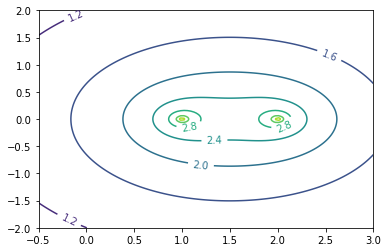

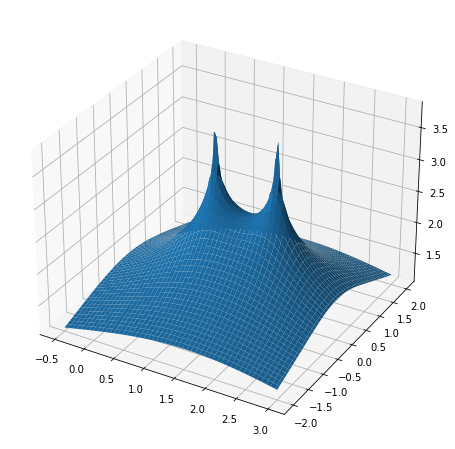

In [25]:
%matplotlib inline
import numpy as np

nx = 100
ny = 200

A = np.array([[1., 100], [0, 2]])
plot_resolvent(A, -.5, -2, 3, 2, nx, ny)

From these plots we can recognize that even small matrix perturbations will lead to large perturbations in the eigenvalues (check that you understand why). This makes it very difficult to reliably compute eigenvalues in this case and is an example of a situation, where the notion of eigenvalues itself is not too useful.